# UCB Practical - Reinforcement Learning
### August 25, 2022
#### By: Radhika Aggarwal
##### (20csu267)

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
data= pd.read_csv(r"Ads_Optimisation.csv")
data.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.shape

(10000, 10)

In [ ]:
# import random
# N= len(data)
# d= len(data.columns)
# ads_selected= []
# total_reward= 0
# for n in range(0, N):
#   ad= random.randrange(d)
#   ads_selected.append(ad)
#   reward= data.values[n, ad]
#   total_reward= total_reward + reward
   

In [ ]:
# total_reward

1205

In [ ]:
# ads= pd.Series(ads_selected).head(5000).value_counts(normalize=True)
# ads

9    0.1062
2    0.1044
8    0.1038
5    0.1024
7    0.1018
6    0.0984
3    0.0976
1    0.0958
4    0.0958
0    0.0938
dtype: float64

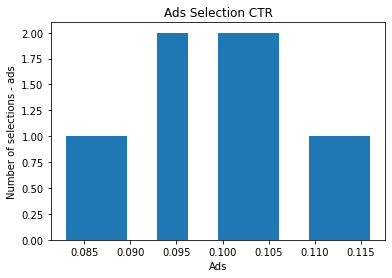

In [ ]:
# plt.hist(ads) #to plot a histogram
# plt.title('Ads Selection CTR')
# plt.xlabel('Ads')
# plt.ylabel('Number of selections - ads')
# plt.show()

In [ ]:
# implementing ucb
import math
N= len(data)
d= len(data.columns)
ads_selected= []
number_of_selections = [0] * d
sum_of_rewards= [0] * d
total_reward= 0



for n in range(0, N):
  ad= 0
  max_upper_bound= 0

  for i in range(0, d):
    if(number_of_selections[i] > 0):
      avg_reward= sum_of_rewards[i]/number_of_selections[i]
      del_i= math.sqrt(3/2 * math.log(n+1) / number_of_selections[i])
      upper_bound= avg_reward + del_i
    else:
      upper_bound= 1e400
      if upper_bound > max_upper_bound:
        max_upper_bound= upper_bound
        ad= i
    ads_selected.append(ad)
    number_of_selections[ad]= number_of_selections[ad] + 1
    reward= data.values[n, ad]
    sum_of_rewards[ad]= sum_of_rewards[ad] + reward
    total_reward= total_reward + reward

In [ ]:
total_reward

17022

In [ ]:
ads= pd.Series(ads_selected).head(10000).value_counts(normalize=False)
ads

0    9955
1       9
2       8
3       7
4       6
5       5
6       4
7       3
8       2
9       1
dtype: int64

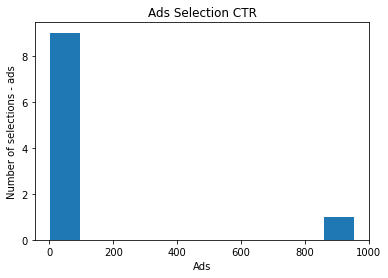

In [ ]:
plt.hist(ads) #to plot a histogram
plt.title('Ads Selection CTR')
plt.xlabel('Ads')
plt.ylabel('Number of selections - ads')
plt.show()